In [1]:
import matplotlib.pyplot as plt
import imagecorruptions
import pickle
#from imagecorrputions import get_corrpution

In [2]:
corr_names = imagecorruptions.get_corruption_names()
corr_names

['gaussian_noise',
 'shot_noise',
 'impulse_noise',
 'defocus_blur',
 'glass_blur',
 'motion_blur',
 'zoom_blur',
 'snow',
 'frost',
 'fog',
 'brightness',
 'contrast',
 'elastic_transform',
 'pixelate',
 'jpeg_compression']

In [3]:
#path to trained models
model_path = './'

corrupts = {}

for ecc in ['b',0,5,10,15,20,100,'t']:
    corrupts[ecc] = {}
    
    for corruption in imagecorruptions.get_corruption_names():
        corrupts[ecc][corruption] = {}

        for severity_level in range(5):
            corrupts[ecc][corruption][severity_level+1] = {}
            if ecc=='b':
                val_results_path = f'{model_path}/baseline_pretrained_detectron2_eval_results/coco_val_2017_corruption_{corruption}_severity_{severity_level+1}_eval/val_results.pkl'
            elif ecc=='t':
                val_results_path = f'/{model_path}/output_trainscratch/trainscratch_ecc100/coco_val_2017_corruption_{corruption}_severity_{severity_level+1}_eval/val_results.pkl'
            else:
                val_results_path = f'{model_path}/finetune_ecc{ecc}/coco_val_2017_corruption_{corruption}_severity_{severity_level+1}_eval/val_results.pkl'
            with open(val_results_path, 'rb') as f:
                val_results = pickle.load(f)
            corrupts[ecc][corruption][severity_level+1]['AP'] = val_results['bbox']['AP']
            corrupts[ecc][corruption][severity_level+1]['AP50'] = val_results['bbox']['AP50']
            corrupts[ecc][corruption][severity_level+1]['AP75'] = val_results['bbox']['AP75']
            corrupts[ecc][corruption][severity_level+1]['APs'] = val_results['bbox']['APs']
            corrupts[ecc][corruption][severity_level+1]['APm'] = val_results['bbox']['APm']
            corrupts[ecc][corruption][severity_level+1]['APl'] = val_results['bbox']['APl']
        
cnames = imagecorruptions.get_corruption_names()


In [18]:
print("average corruption robustness")
for model in ['b',0,5,10,15,20,100,'t']:
    print(model)
    count = 0.0
    score = 0.0
    for corruption in imagecorruptions.get_corruption_names():
        for severity_level in range(5):
            score += corrupts[model][corruption][severity_level+1]['AP']
            count += 1
    print(score/count)

average corruption robustness
b
17.340994555008706
0
16.76575504604751
5
17.225324226366137
10
17.44053761628357
15
17.239689899512303
20
17.252427798368373
100
17.475432642076186
t
16.720061675483567


In [19]:
print("average corruption robustness highest severity")
for model in ['b',0,5,10,15,20,100,'t']:
    print(model)
    count = 0.0
    score = 0.0
    for corruption in imagecorruptions.get_corruption_names():
        # for severity_level in range(5):
        severity_level = 5
        score += corrupts[model][corruption][severity_level]['AP']
        count += 1
    print(score/count)

average corruption robustness highest severity
b
9.568363572398646
0
9.027023486190904
5
9.428744213523407
10
9.692187376235372
15
9.647863737817605
20
9.648204499970625
100
9.839970459779385
t
9.882486676924938


In [20]:
print("average corruption robustness lowest severity")
for model in ['b',0,5,10,15,20,100,'t']:
    print(model)
    count = 0.0
    score = 0.0
    for corruption in imagecorruptions.get_corruption_names():
        # for severity_level in range(5):
        severity_level = 1
        score += corrupts[model][corruption][severity_level]['AP']
        count += 1
    print(score/count)

average corruption robustness lowest severity
b
25.076945160299154
0
24.53907694369252
5
24.90284543627563
10
24.928247626109926
15
24.65518399567517
20
24.715837911336
100
24.802687228649443
t
23.22774288359448


In [21]:
print("average corruption robustness by corruption")
print(imagecorruptions.get_corruption_names())
model_corrupt_dict = {}
for model in ['b',100,'t']:
    print(model)
    by_corrupt = {}
    for corruption in imagecorruptions.get_corruption_names():
        score = 0.0
        for severity_level in range(5):
        # severity_level = 1
            score += corrupts[model][corruption][severity_level+1]['AP']
        by_corrupt[corruption] = score/5.0
    by_corrupt_sort = dict(sorted(by_corrupt.items(), key=lambda item: item[1]))
    print(by_corrupt)
    model_corrupt_dict[model] = by_corrupt 

average corruption robustness by corruption
['gaussian_noise', 'shot_noise', 'impulse_noise', 'defocus_blur', 'glass_blur', 'motion_blur', 'zoom_blur', 'snow', 'frost', 'fog', 'brightness', 'contrast', 'elastic_transform', 'pixelate', 'jpeg_compression']
b
{'gaussian_noise': 16.963435184644744, 'shot_noise': 17.11404658884067, 'impulse_noise': 15.805511354997623, 'defocus_blur': 17.799019249125294, 'glass_blur': 11.938369595055358, 'motion_blur': 15.586312861348798, 'zoom_blur': 6.942927605744719, 'snow': 13.609066435644397, 'frost': 17.37293380734623, 'fog': 23.439260044786305, 'brightness': 28.284549142605044, 'contrast': 16.848101710433934, 'elastic_transform': 19.719202829803237, 'pixelate': 18.293551110797356, 'jpeg_compression': 20.398630803956863}
100
{'gaussian_noise': 16.449051326531244, 'shot_noise': 16.508398128793083, 'impulse_noise': 15.011866480504029, 'defocus_blur': 17.42813663223619, 'glass_blur': 14.475943334734032, 'motion_blur': 15.756953139805699, 'zoom_blur': 7.21

In [20]:
title = "Corruption AP Subtracted from Finetune Ecc 0 for RCNN"
eccnames = ['BL','$5^{\circ}$ FT','$10^{\circ}$ FT','$15^{\circ}$ FT','$20^{\circ}$ FT','all $^{\circ}$ FT']
eccs = ['b',100,'t']
cnames = imagecorruptions.get_corruption_names()
fig, axes = plt.subplots(3,5,figsize=(12,8))
plt.suptitle(title, fontsize=16)
for corrupt, ax in zip(cnames, axes.ravel()):
# for corrupt in cnames:
    cvals = [corrupts[ecc][corrupt][3]['AP'] for ecc in eccs]
    cvals = [val - cvals[1] for val in cvals]
    cvals = [cvals[0]] + cvals[2:]

    #print(clocs)
    ax.bar(eccnames, cvals)
    ax.tick_params(labelrotation=45)
    # ax.set_xticklabels(eccnames,rotation=45, ha='right')
    ax.axhline(0,color='k')
    #ax.set_xticklabels(xticklabels, rotation = 45)
    #print(cnames)
    ax.set_ylim([-4.5,4.5])
    ax.set_title(f'{corrupt}')
fig.text(0.5, 0.01, 'Type of Model Finetuning', ha='center', va='center',fontsize=14)
fig.text(0.01, 0.5, 'Bounding Box Average Precision', ha='center', va='center', rotation='vertical', fontsize=14)

{'b': {'gaussian_noise': 16.963435184644744,
  'shot_noise': 17.11404658884067,
  'impulse_noise': 15.805511354997623,
  'defocus_blur': 17.799019249125294,
  'glass_blur': 11.938369595055358,
  'motion_blur': 15.586312861348798,
  'zoom_blur': 6.942927605744719,
  'snow': 13.609066435644397,
  'frost': 17.37293380734623,
  'fog': 23.439260044786305,
  'brightness': 28.284549142605044,
  'contrast': 16.848101710433934,
  'elastic_transform': 19.719202829803237,
  'pixelate': 18.293551110797356,
  'jpeg_compression': 20.398630803956863},
 100: {'gaussian_noise': 16.449051326531244,
  'shot_noise': 16.508398128793083,
  'impulse_noise': 15.011866480504029,
  'defocus_blur': 17.42813663223619,
  'glass_blur': 14.475943334734032,
  'motion_blur': 15.756953139805699,
  'zoom_blur': 7.211766915459778,
  'snow': 13.673217660900184,
  'frost': 18.882232522687726,
  'fog': 22.63486467173186,
  'brightness': 27.306531391608605,
  'contrast': 15.93480116152582,
  'elastic_transform': 20.933447193

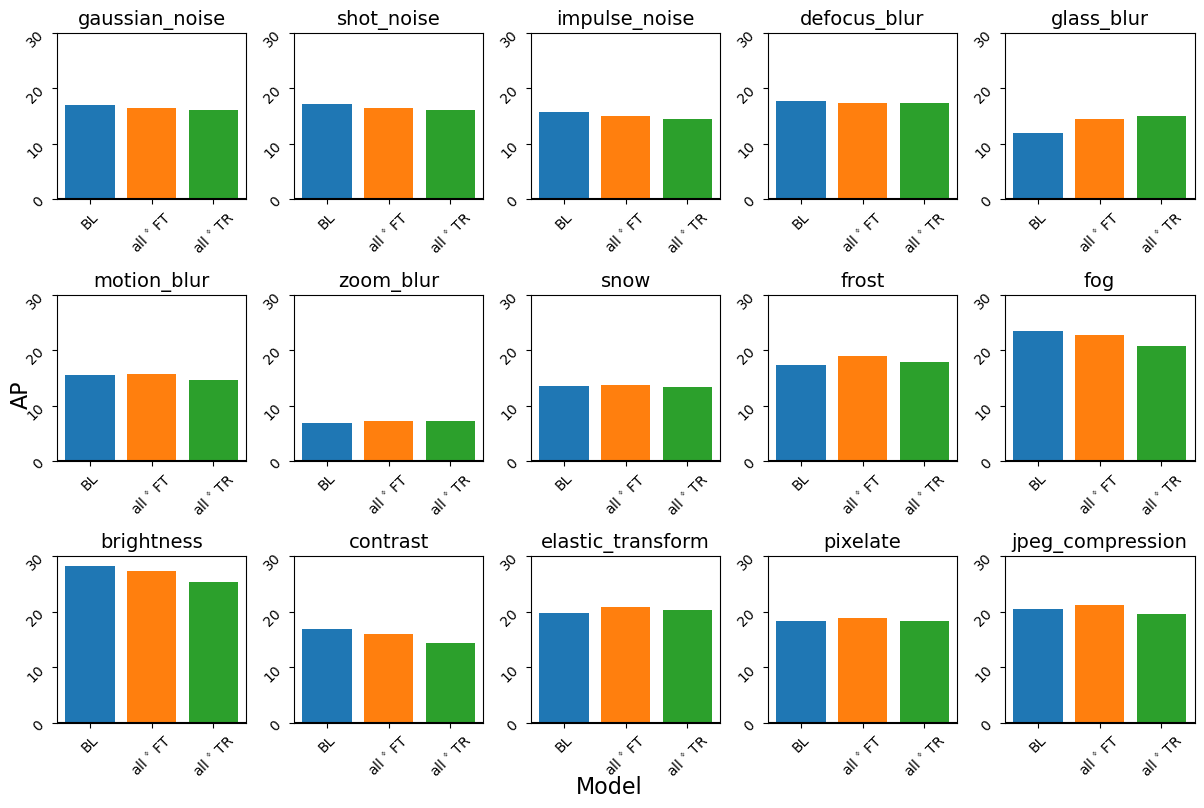

In [45]:
eccnames = ['BL','all $^{\circ}$ FT','all $^{\circ}$ TR']
eccs = ['b',100,'t']
cnames = imagecorruptions.get_corruption_names()
fig, axes = plt.subplots(3,5,figsize=(12,8))
# plt.suptitle(title, fontsize=16)
for corrupt, ax in zip(cnames, axes.ravel()):
    # for ecc in eccs:
        # cvals = [corrupts[ecc][corrupt][3]['AP'] for ecc in eccs]
    cvals = [model_corrupt_dict[eccs[0]][corrupt],model_corrupt_dict[eccs[1]][corrupt],model_corrupt_dict[eccs[2]][corrupt]]
    # print(cvals)
    #print(clocs)
    for i,c in enumerate(cvals):
            
        ax.bar(eccnames[i], c)
    ax.tick_params(labelrotation=45)
    # ax.set_xticklabels(eccnames,rotation=45, ha='right')
    ax.axhline(0,color='k')
    ax.xaxis.set_tick_params(labelsize=10)
    #ax.set_xticklabels(xticklabels, rotation = 45)
    #print(cnames)
    ax.set_ylim([0,30])
    ax.set_title(f'{corrupt}',fontsize=14)
    # ax.xlabels(fontsize=12)
fig.text(0.5, 0.01, 'Model', ha='center', va='center',fontsize=16)
fig.text(0.01, 0.5, 'AP', ha='center', va='center', rotation='vertical', fontsize=16)
plt.tight_layout()

plt.savefig("./CocoPDetection/psychophysics_figs_ICLR/all_corruption_mean_finetuning_ICCV.png",dpi=300)

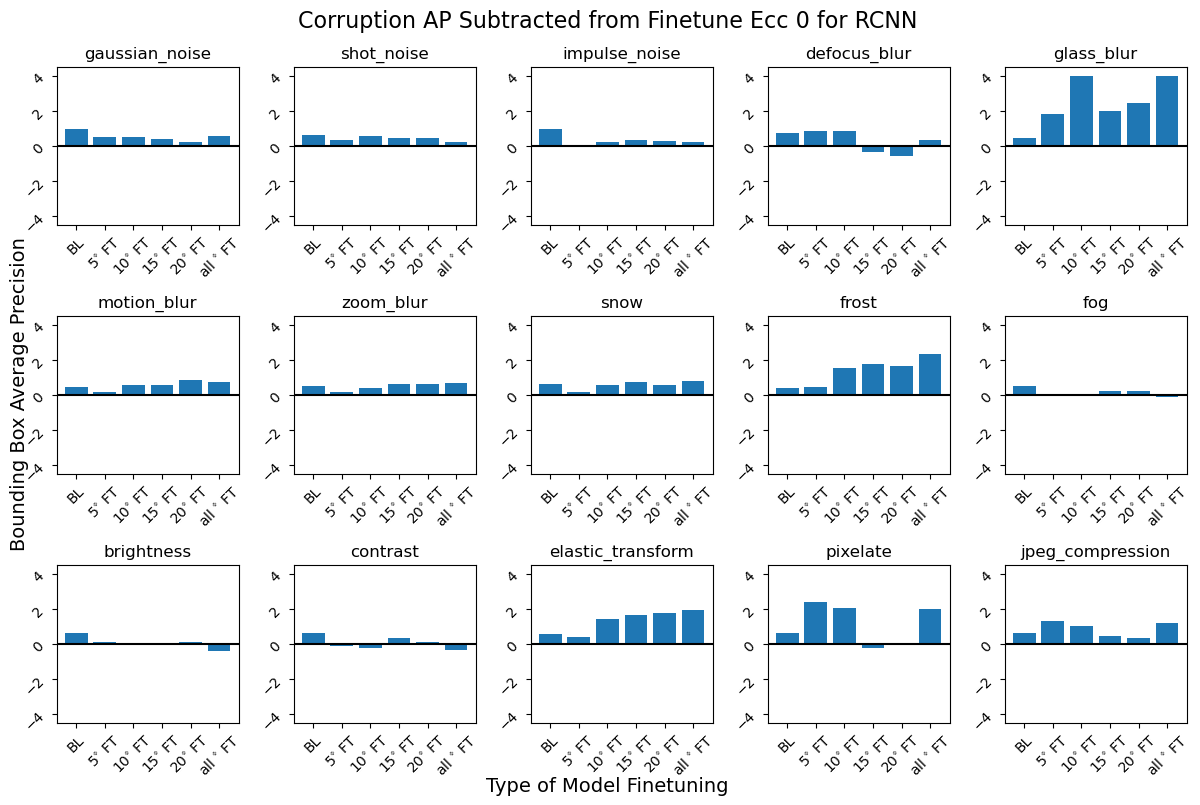

In [9]:
# baseline=False
# eccnames = ['baseline','ecc5','ecc10','ecc15','eccAll']
# title = "Corruption AP Subtracted from Baseline"
# if not baseline:
#     eccnames[0] = 'ecc0'
#     title = "Corruption AP Subtracted from Finetune Ecc 0"
title = "Corruption AP Subtracted from Finetune Ecc 0 for RCNN"
eccnames = ['BL','$5^{\circ}$ FT','$10^{\circ}$ FT','$15^{\circ}$ FT','$20^{\circ}$ FT','all $^{\circ}$ FT','all $^{\circ}$ TR']
eccs = ['b',0,5,10,15,20,100]
cnames = imagecorruptions.get_corruption_names()
fig, axes = plt.subplots(3,5,figsize=(12,8))
plt.suptitle(title, fontsize=16)
for corrupt, ax in zip(cnames, axes.ravel()):
# for corrupt in cnames:
    cvals = [corrupts[ecc][corrupt][3]['AP'] for ecc in eccs]
    cvals = [val - cvals[1] for val in cvals]
    cvals = [cvals[0]] + cvals[2:]

    #print(clocs)
    ax.bar(eccnames, cvals)
    ax.tick_params(labelrotation=45)
    # ax.set_xticklabels(eccnames,rotation=45, ha='right')
    ax.axhline(0,color='k')
    #ax.set_xticklabels(xticklabels, rotation = 45)
    #print(cnames)
    ax.set_ylim([-4.5,4.5])
    ax.set_title(f'{corrupt}')
fig.text(0.5, 0.01, 'Type of Model Finetuning', ha='center', va='center',fontsize=14)
fig.text(0.01, 0.5, 'Bounding Box Average Precision', ha='center', va='center', rotation='vertical', fontsize=14)
plt.tight_layout()

plt.savefig("./CocoPDetection/psychophysics_figs_ICLR/all_corruption_AP_severity5_finetuning_ICCV.png",dpi=300)



    #plt.ylim(0,25)
    # plt.show()
    

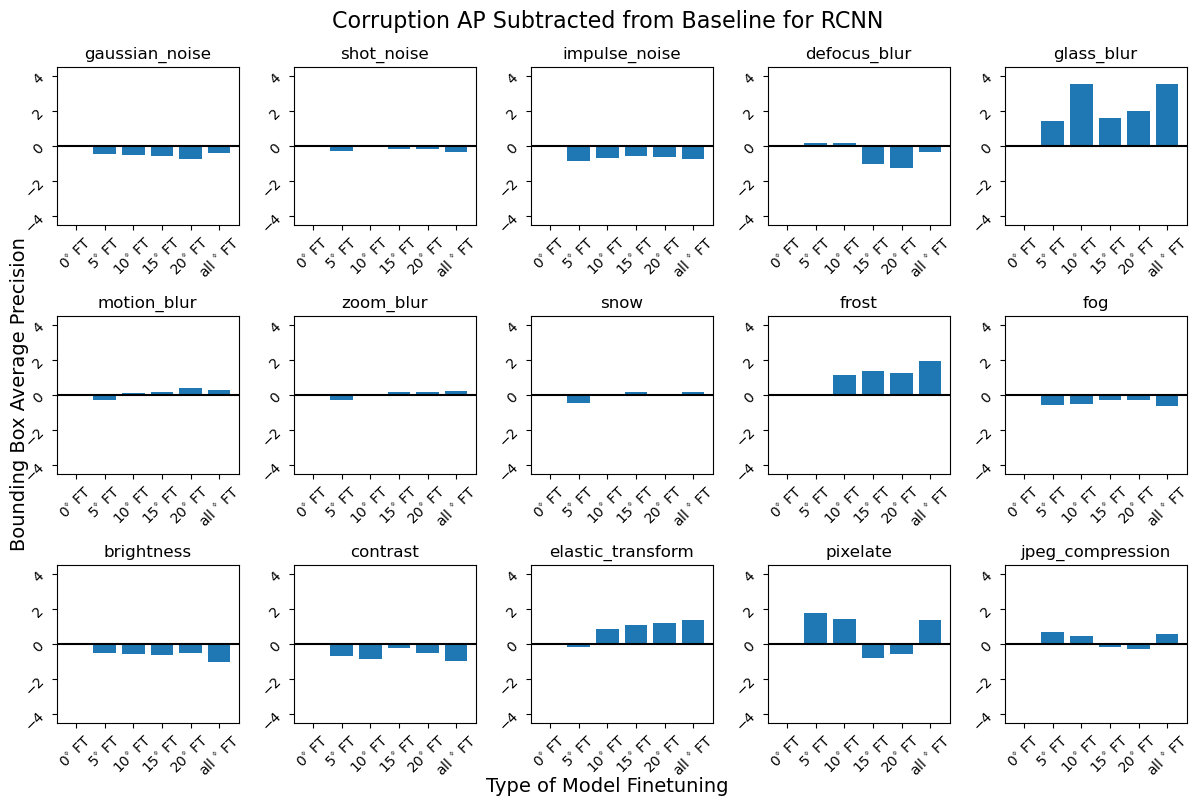

In [10]:
# baseline=False
# eccnames = ['baseline','ecc5','ecc10','ecc15','eccAll']
# title = "Corruption AP Subtracted from Baseline"
# if not baseline:
#     eccnames[0] = 'ecc0'
#     title = "Corruption AP Subtracted from Finetune Ecc 0"
title = "Corruption AP Subtracted from Baseline for RCNN"
eccnames = ['$0^{\circ}$ FT','$5^{\circ}$ FT','$10^{\circ}$ FT','$15^{\circ}$ FT','$20^{\circ}$ FT','all $^{\circ}$ FT']
eccs = ['b',0,5,10,15,20,100]
cnames = imagecorruptions.get_corruption_names()
fig, axes = plt.subplots(3,5,figsize=(12,8))
plt.suptitle(title, fontsize=16)
for corrupt, ax in zip(cnames, axes.ravel()):
# for corrupt in cnames:
    cvals = [corrupts[ecc][corrupt][3]['AP'] for ecc in eccs]
    cvals = [val - cvals[0] for val in cvals]
    cvals = [cvals[0]] + cvals[2:]

    #print(clocs)
    ax.bar(eccnames, cvals)
    ax.tick_params(labelrotation=45)
    # ax.set_xticklabels(eccnames,rotation=45, ha='right')
    ax.axhline(0,color='k')
    #ax.set_xticklabels(xticklabels, rotation = 45)
    #print(cnames)
    ax.set_ylim([-4.5,4.5])
    ax.set_title(f'{corrupt}')
fig.text(0.5, 0.01, 'Type of Model Finetuning', ha='center', va='center',fontsize=14)
fig.text(0.01, 0.5, 'Bounding Box Average Precision', ha='center', va='center', rotation='vertical', fontsize=14)
plt.tight_layout()

plt.savefig("./output/all_corruption_AP_severity5_finetuning_ICCV_from_BL.png",dpi=300)



    #plt.ylim(0,25)
    # plt.show()
    

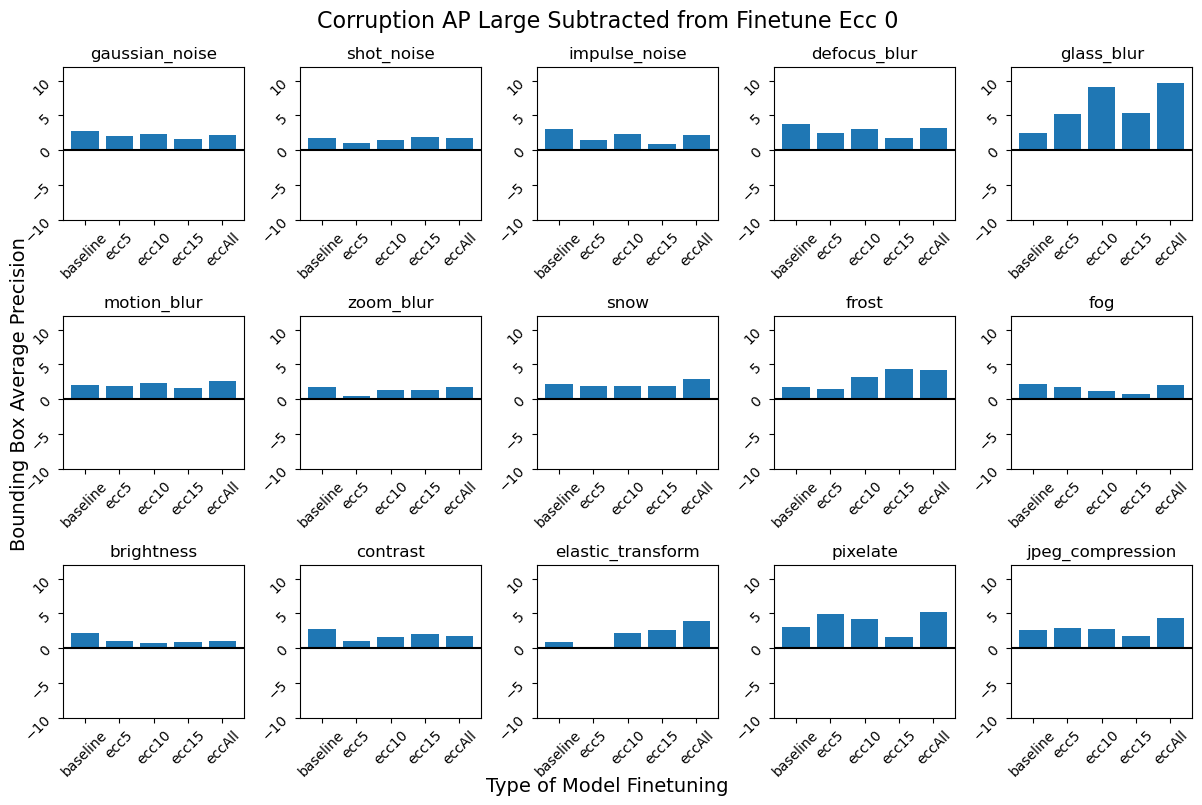

In [11]:
title = "Corruption AP Large Subtracted from Finetune Ecc 0"
eccnames = ['baseline','ecc5','ecc10','ecc15','eccAll']
eccs = ['b',0,5,10,15,100]
cnames = imagecorruptions.get_corruption_names()
# eccs = [0,5,10,15,100]
fig, axes = plt.subplots(3,5,figsize=(12,8))
plt.suptitle(title, fontsize=16)
for corrupt, ax in zip(cnames, axes.ravel()):
# for corrupt in cnames:
    cvals = [corrupts[ecc][corrupt][3]['APl'] for ecc in eccs]
    cvals = [val - cvals[1] for val in cvals]
    cvals = [cvals[0]] + cvals[2:]
    #print(clocs)
    ax.bar(eccnames, cvals)
    ax.tick_params(labelrotation=45)
    # ax.set_xticklabels(eccnames,rotation=45, ha='right')
    ax.axhline(0,color='k')
    #ax.set_xticklabels(xticklabels, rotation = 45)
    #print(cnames)
    ax.set_ylim([-10,12])
    ax.set_title(f'{corrupt}')
fig.text(0.5, 0.01, 'Type of Model Finetuning', ha='center', va='center',fontsize=14)
fig.text(0.01, 0.5, 'Bounding Box Average Precision', ha='center', va='center', rotation='vertical', fontsize=14)
plt.tight_layout()

plt.savefig("./output/all_corruption_AP_large_severity5_finetuning.png",dpi=300)

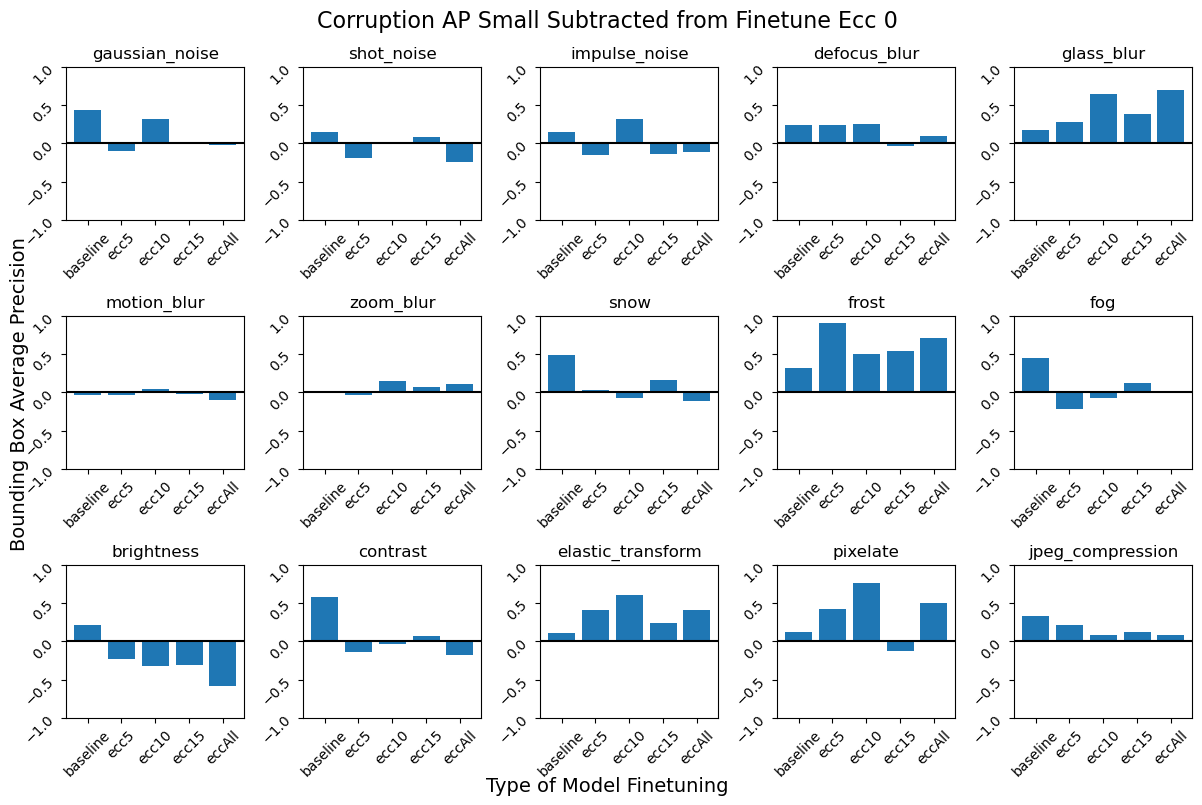

In [12]:
title = "Corruption AP Small Subtracted from Finetune Ecc 0"
eccnames = ['baseline','ecc5','ecc10','ecc15','eccAll']
eccs = ['b',0,5,10,15,100]
cnames = imagecorruptions.get_corruption_names()
fig, axes = plt.subplots(3,5,figsize=(12,8))
plt.suptitle(title, fontsize=16)
for corrupt, ax in zip(cnames, axes.ravel()):
# for corrupt in cnames:
    cvals = [corrupts[ecc][corrupt][3]['APs'] for ecc in eccs]
    cvals = [val - cvals[1] for val in cvals]
    cvals = [cvals[0]] + cvals[2:]
    #print(clocs)
    ax.bar(eccnames, cvals)
    ax.tick_params(labelrotation=45)
    # ax.set_xticklabels(eccnames,rotation=45, ha='right')
    ax.axhline(0,color='k')
    #ax.set_xticklabels(xticklabels, rotation = 45)
    #print(cnames)
    ax.set_ylim([-1,1])
    ax.set_title(f'{corrupt}')
fig.text(0.5, 0.01, 'Type of Model Finetuning', ha='center', va='center',fontsize=14)
fig.text(0.01, 0.5, 'Bounding Box Average Precision', ha='center', va='center', rotation='vertical', fontsize=14)
plt.tight_layout()

plt.savefig("./output/all_corruption_AP_small_severity5_finetuning.png",dpi=300)

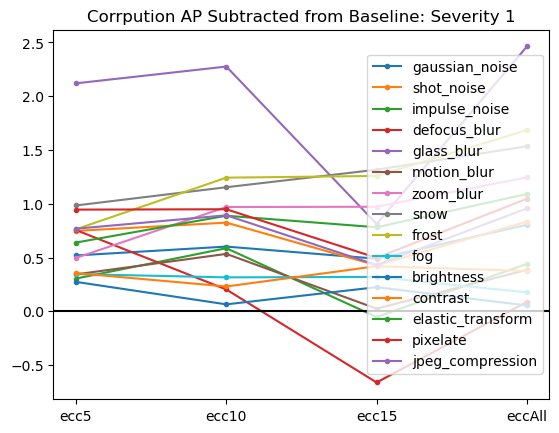

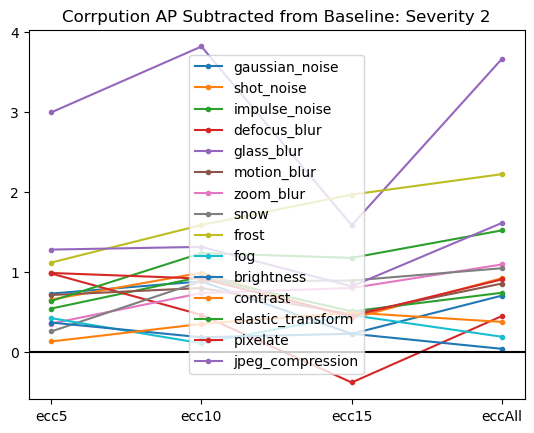

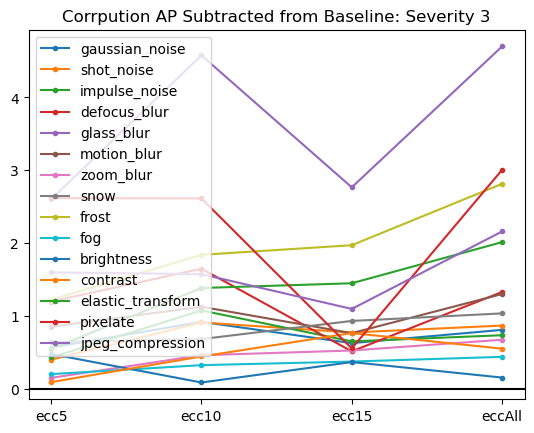

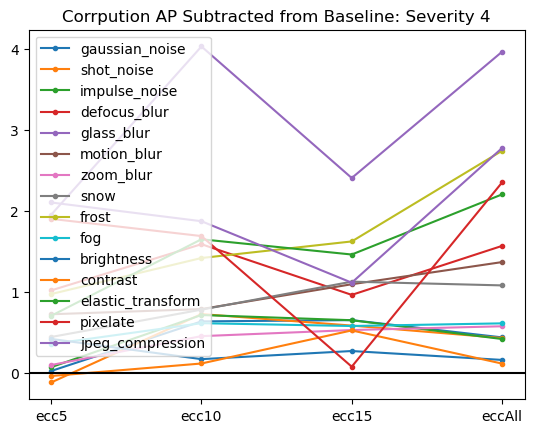

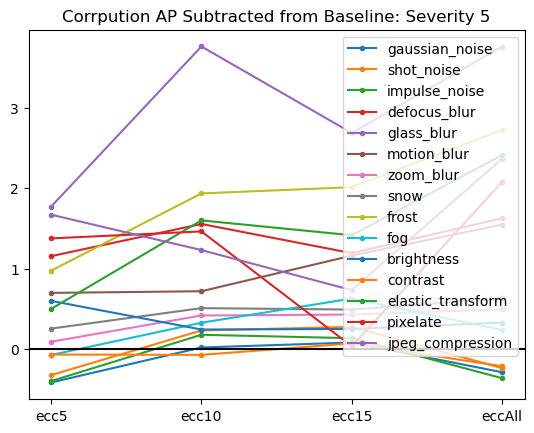

<Figure size 640x480 with 0 Axes>

In [11]:
# eccnames = ['baseline','5','10','15']
eccnames = ['baseline','ecc5','ecc10','ecc15','eccAll']
eccs = [0,5,10,15,100]


for severity in range(5):
    for corrupt in cnames:

        cvals = [corrupts[ecc][corrupt][severity+1]['AP'] for ecc in eccs]
        cvals = [val - cvals[0] for val in cvals]

        #print(clocs)
        plt.plot(eccnames[1:], cvals[1:],'.-',label=corrupt)
        #plt.xticks(rotation=45, ha='right')
    plt.axhline(0,color='k')
    #ax.set_xticklabels(xticklabels, rotation = 45)
    #print(cnames)
    plt.title(f'Corrpution AP Subtracted from Baseline: Severity {severity+1}')
    plt.legend()
        #plt.ylim(0,25)
    plt.show()
    plt.savefig(f"./output/all_corruption_AP_severity_{severity+1}_lineplot_finetuning.png",dpi=300)

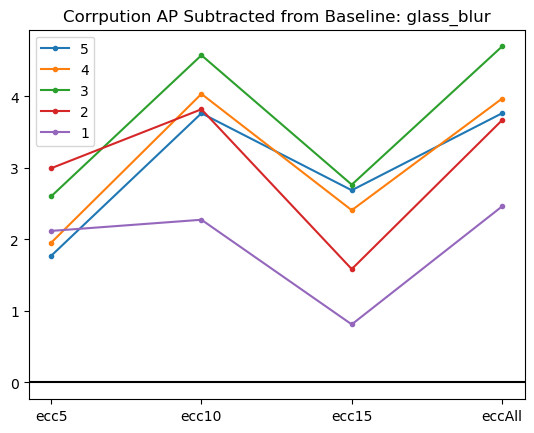

In [12]:
corruption = 'glass_blur'
for severity in reversed(range(5)):

    cvals = [corrupts[ecc]['glass_blur'][severity+1]['AP'] for ecc in eccs]
    cvals = [val - cvals[0] for val in cvals]

    #print(clocs)
    plt.plot(eccnames[1:], cvals[1:],'.-',label=severity+1)
    #plt.xticks(rotation=45, ha='right')
plt.axhline(0,color='k')
#ax.set_xticklabels(xticklabels, rotation = 45)
#print(cnames)
plt.title(f'Corrpution AP Subtracted from Baseline: {corruption}')
plt.legend()
    #plt.ylim(0,25)
plt.show()

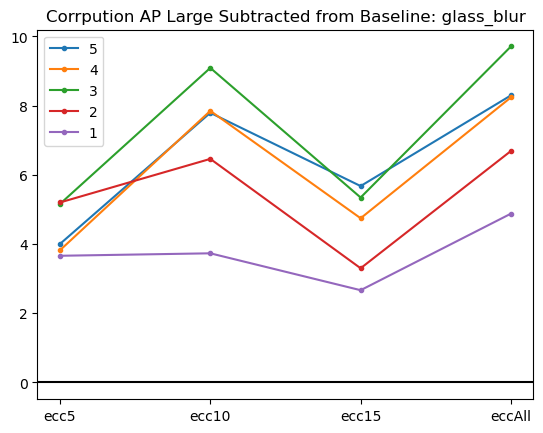

In [13]:
for severity in reversed(range(5)):

    cvals = [corrupts[ecc]['glass_blur'][severity+1]['APl'] for ecc in eccs]
    cvals = [val - cvals[0] for val in cvals]

    #print(clocs)
    plt.plot(eccnames[1:], cvals[1:],'.-',label=severity+1)
    #plt.xticks(rotation=45, ha='right')
plt.axhline(0,color='k')
#ax.set_xticklabels(xticklabels, rotation = 45)
#print(cnames)
plt.title(f'Corrpution AP Large Subtracted from Baseline: {corruption}')
plt.legend()
    #plt.ylim(0,25)
plt.show()

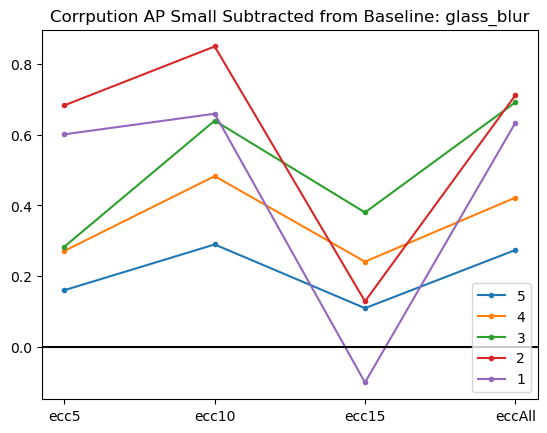

In [14]:
for severity in reversed(range(5)):

    cvals = [corrupts[ecc]['glass_blur'][severity+1]['APs'] for ecc in eccs]
    cvals = [val - cvals[0] for val in cvals]

    #print(clocs)
    plt.plot(eccnames[1:], cvals[1:],'.-',label=severity+1)
    #plt.xticks(rotation=45, ha='right')
plt.axhline(0,color='k')
#ax.set_xticklabels(xticklabels, rotation = 45)
#print(cnames)
plt.title(f'Corrpution AP Small Subtracted from Baseline: {corruption}')
plt.legend()
    #plt.ylim(0,25)
plt.show()

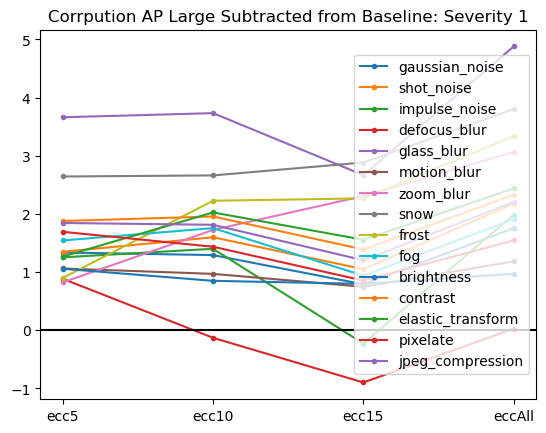

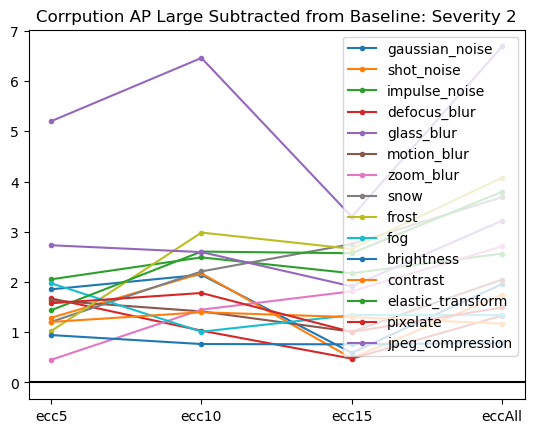

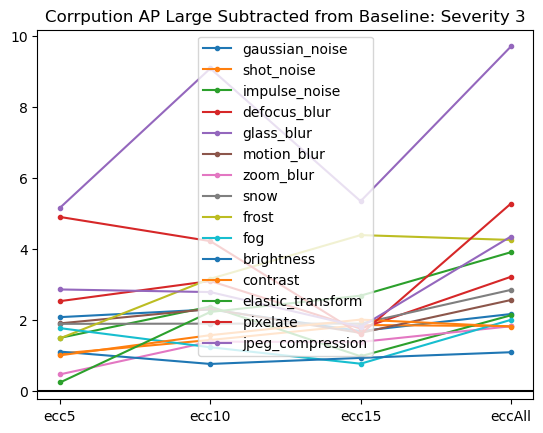

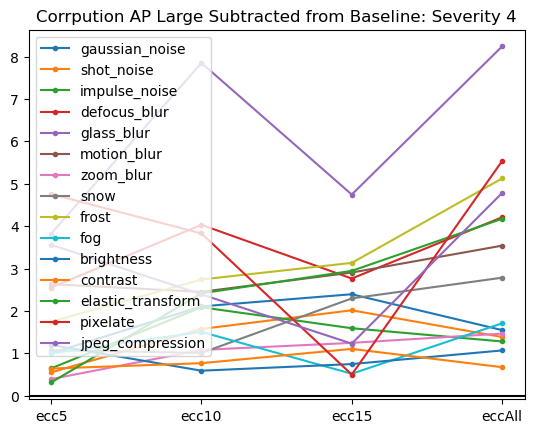

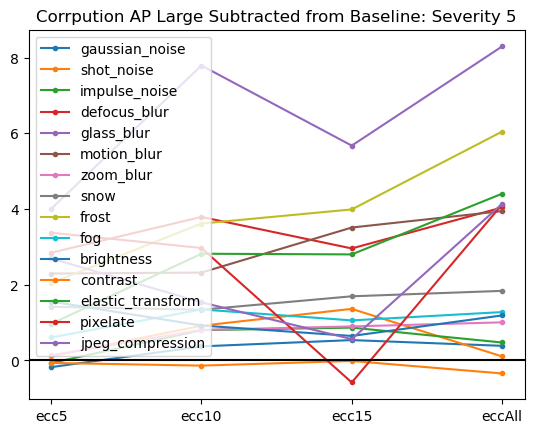

In [15]:
# eccnames = ['baseline','5','10','15']


for severity in range(5):
    for corrupt in cnames:

        cvals = [corrupts[ecc][corrupt][severity+1]['APl'] for ecc in eccs]
        cvals = [val - cvals[0] for val in cvals]

        #print(clocs)
        plt.plot(eccnames[1:], cvals[1:],'.-',label=corrupt)
        #plt.xticks(rotation=45, ha='right')
    plt.axhline(0,color='k')
    #ax.set_xticklabels(xticklabels, rotation = 45)
    #print(cnames)
    plt.title(f'Corrpution AP Large Subtracted from Baseline: Severity {severity+1}')
    plt.legend()
        #plt.ylim(0,25)
    plt.show()

## Visualize Corruptions

In [6]:
import sys, os, distutils.core
import torch, detectron2
import cv2
import matplotlib.pyplot as plt

from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

from imagecorruptions import corrupt

In [17]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
#cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = f'{model_path}/detectron2/model_weights/R_50_FPN_3x/model_final_280758.pkl'
#cfg.MODEL.WEIGHTS = '/home/gridsan/groups/RosenholtzLab/detection_repos/output/finetune_ecc100/model_final.pth'
cfg.SOLVER.BASE_LR = 0.0001 #0.001 
#model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor_base = DefaultPredictor(cfg)
torch.no_grad()
#outputs = predictor(test_im)


cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
#cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = f'{model_path}/output/finetune_ecc100/model_final.pth'
cfg.SOLVER.BASE_LR = 0.0001 #0.001 
#model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor_ft = DefaultPredictor(cfg)
torch.no_grad()
#outputs = predictor(test_im)

[01/27 14:06:41 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/gridsan/groups/RosenholtzLab/detection_repos/detectron2/model_weights/R_50_FPN_3x/model_final_280758.pkl ...
[01/27 14:06:42 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/gridsan/groups/RosenholtzLab/detection_repos/output/finetune_ecc100/model_final.pth ...


## Corrputions Visualization

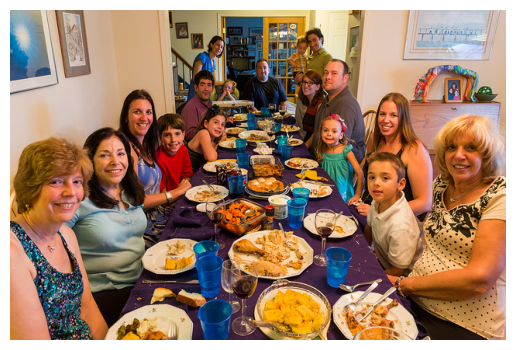

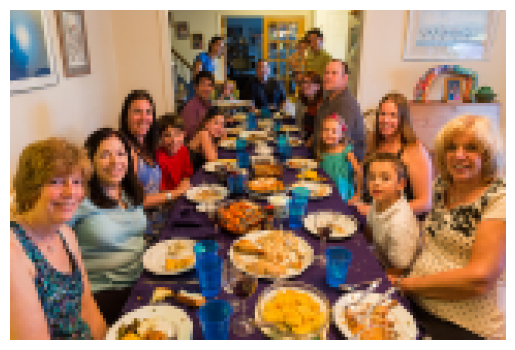

In [36]:
test_img = cv2.imread('./cocop_stims/000000018380_inpaint.png')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img)
plt.axis('off')
plt.show()

test_corrupt = corrupt(test_img, corruption_name='pixelate', severity=5)
plt.imshow(test_corrupt)
plt.axis('off')
plt.show()

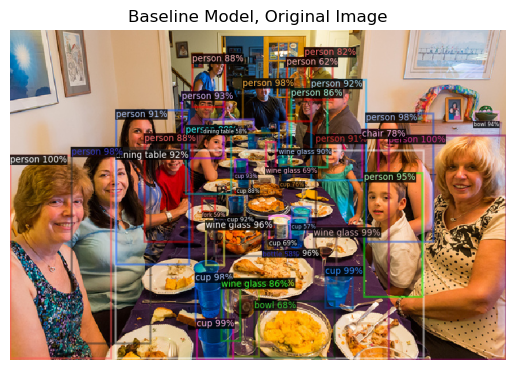

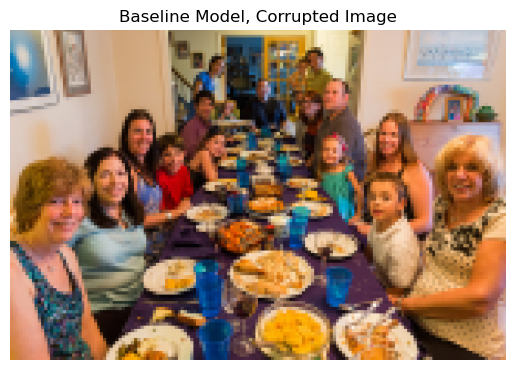

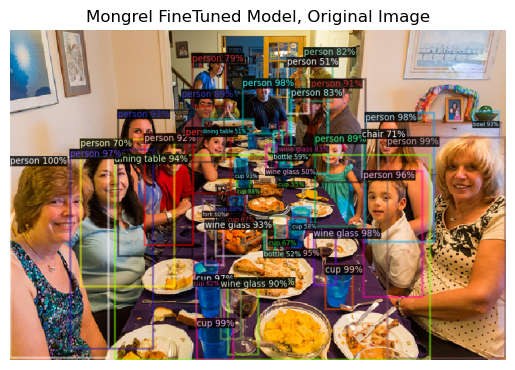

(-0.5, 767.5, 510.5, -0.5)

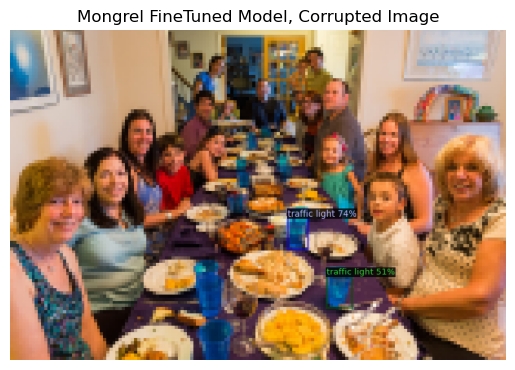

In [37]:
#baseline on original image
outputs = predictor_base(test_img)
v = Visualizer(test_img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])
plt.title('Baseline Model, Original Image')
plt.axis('off')
plt.show()

#baseline on corrupted
outputs = predictor_base(test_corrupt)
v = Visualizer(test_corrupt[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])
plt.title('Baseline Model, Corrupted Image')
plt.axis('off')
plt.show()

#baseline on original image
outputs = predictor_ft(test_img)
v = Visualizer(test_img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])
plt.title('Mongrel FineTuned Model, Original Image')
plt.axis('off')
plt.show()

#baseline on corrupted
outputs = predictor_ft(test_corrupt)
v = Visualizer(test_corrupt[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])
plt.title('Mongrel FineTuned Model, Corrupted Image')
plt.axis('off')